<a id="ID_intr"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  



## 1.0 | INTRODUCTION

Traditionally, banks and post offices have been distinct entities, each serving specific purposes. Banks handle financial transactions like savings, deposits, and withdrawals, while post offices focus on sending mail and packages. However, recent efforts aim to streamline services by integrating post offices into the banking system. This approach would allow a single organization to manage both banking and postal activities, potentially easing the burden on the government and optimizing resource utilization for public service. 

Banking Retail Points is an open data set provided by Geolytix, focusing on the locations of bank and building society branches across the UK. These branches play a crucial role as essential services in their respective areas. This dataset includes both current and closed (since 2015) branch locations for operators with more than 10 branches. Each entry in the dataset includes details such as store name, address (including postcode), latitude, longitude, the Geolytix seamless towns and localities, the branch’s permanent closure date (if applicable), and the distance to the nearest currently trading Post Office.(Geolytix)

.To understand whether is there any correlation or causation between the closed branches of banks and their nearest post offices. This paper outlines the method and results of an exploratory Supervised Classification analysis of United Kingdom Banks and Building Society branches and their nearest Post Office(PO) which indicates that if there is any relation in the closure of these branches and the nearest post office located..




### 1.1 | Requirements to run the analysis

An overview of packages used to run the analysis with brief explanation of their role.

First we will import relevant libraries
* `pandas` for data import and handling;
* `matplotlib`;
* `numpy`;
* `sklearn`; for different machine learning model.
* `statsmodels` for linear regression and VIF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn import preprocessing # Import label encoder
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 50) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

<a id="ID_lit"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 2.0 | Literature review

The retail banking sector in the United Kingdom has undergone significant changes, including branch closures. Competition and the presence of alternative banking facilities, such as Post Office branches, influence closure likelihood. However, these closures can disproportionately affect vulnerable communities, impacting access to financial services. Policymakers and institutions should consider these implications as they navigate the evolving landscape of retail banking. (Clark, 2023)

•	The UK retail banking market is characterized by a mix of traditional banks and building societies.

•	While the PRA recognizes a total of 160 banks and 43 building societies, the market is dominated by approximately 20 major players.

•	These major players include Barclays, Santander, NatWest, Lloyds Banking Group, and HSBC.

•	Together, they command a substantial 77% share of the retail banking marke(Bank of England, 2023)

The UK government has aimed to provide ‘universal banking services’ through the post office network for the past two decades. To achieve this, they’ve implemented various policies and mechanisms. One such mechanism involves defining six official criteria for post office access, based on the percentage of the UK population living within one mile, three miles, and six miles of a post office. (Sonea,2021)

The UK Government uses the Post Office Ltd to distribute welfare payments through its extensive network of access points.(The Post Office Network Report 2021)


Another study, conducted by the University of Sheffield's Centre for Research into Accounting and Finance in Context and the University of Bristol's Personal Finance Research Centre, reveals the impact of bank closures on Post Office services in the UK. One in ten UK Post Offices has been affected by a nearby bank closure within a 1km radius, leading to a 27% increase in demand for cash deposit services. Areas with a higher number of bank branches experienced a greater number of closures, predominantly in urban regions.
The closure of multiple bank branches in the same area resulted in a higher increase (58%) in Post Office deposit volumes. The study highlights that individuals and businesses seek alternative methods, such as Post Office services, for cash deposits when local banks close.  It underscores the importance of maintaining access to cash services, particularly in communities affected by bank closures (Bristol, 2022).

This leads to a number of research questions:

        * RQ1: Does having a nearby Post Office impact the risk of bank branch closure?
        * RQ2: Are some companies more likely to close branches than others?

This paper works to address these questions and figure out whether the hypothesis is true or not.



<a id="ID_research"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 3.0 | Research Question

How effectively do Post Offices bridge the gap left by closed bank branches in terms of financial services accessibility?

<a id="ID_data"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 4.0 | Data Loading and Exploration

This study uses bank operating information provided by the location analytics company Geolytix (Geolytix, 2021);
it contains a panel dataset from 2015 to 2021 on the bank branches that were open in 2015 and an indication if the branch subsequently close.


The entire dataset is available for download. [here](https://drive.google.com/file/d/1RjyAK7qa-qoKtU25KI4e-_mmdxW601tj/view).d.

Loading Retail Points of Bank

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Reading the csv file.

#bank_rp = pd.read_csv('data/uk_bank.csv')

#bank_rp = pd.read_csv('/content/drive/MyDrive/uk_bank.csv')

bank_rp = pd.read_csv('https://raw.githubusercontent.com/sameera006/Retail-Bank-PO/master/data/uk_bank.csv')

#https://drive.google.com/file/d/1RjyAK7qa-qoKtU25KI4e-_mmdxW601tj/view

In [6]:
bank_rp.head()

,id,brand_full,brand_short,branch_name,branch_type,add_one,add_two,suburb,town,region,...,hours_wednesday,hours_thursday,hours_friday,hours_saturday,trading_hours,status,close_month,close_year,po_dist,open_year
0,11210,TSB,TSB,"Louth, The Salvation Army Centre",Pop Up Branch,The Salvation Army Centre,13 Church Street,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,"13,232.0000","2,023.0000"
1,10535,Royal Bank of Scotland,RBS,Kyle Mobile Branch,Mobile Branch,Harbour Slip Kyle IV40 8AF,NaN,NaN,Kyle of Lochalsh,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,151.0000,"2,022.0000"
2,10401,Royal Bank of Scotland,RBS,Lerwick,Branch,81 Commercial Street Lerwick ZE1 0AJ,NaN,NaN,Lerwick,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,129.0000,"2,022.0000"
3,10511,Royal Bank of Scotland,RBS,Armadale Mobile Branch,Mobile Branch,Ragamuffin shop Armadale IV45 8RQ,NaN,NaN,"Armadale, Highland, IV45",Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,137.0000,"2,022.0000"
4,10483,Royal Bank of Scotland,RBS,Appin Mobile Branch,Mobile Branch,Appin Village Hall (service paused) Appin PA38...,NaN,NaN,Appin,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,"3,306.0000","2,022.0000"


Above is the dataset of Retail points of bank of UK. Its a large enough data which contains many relevant columns which will be useful in our analysis.

**Variable Description**

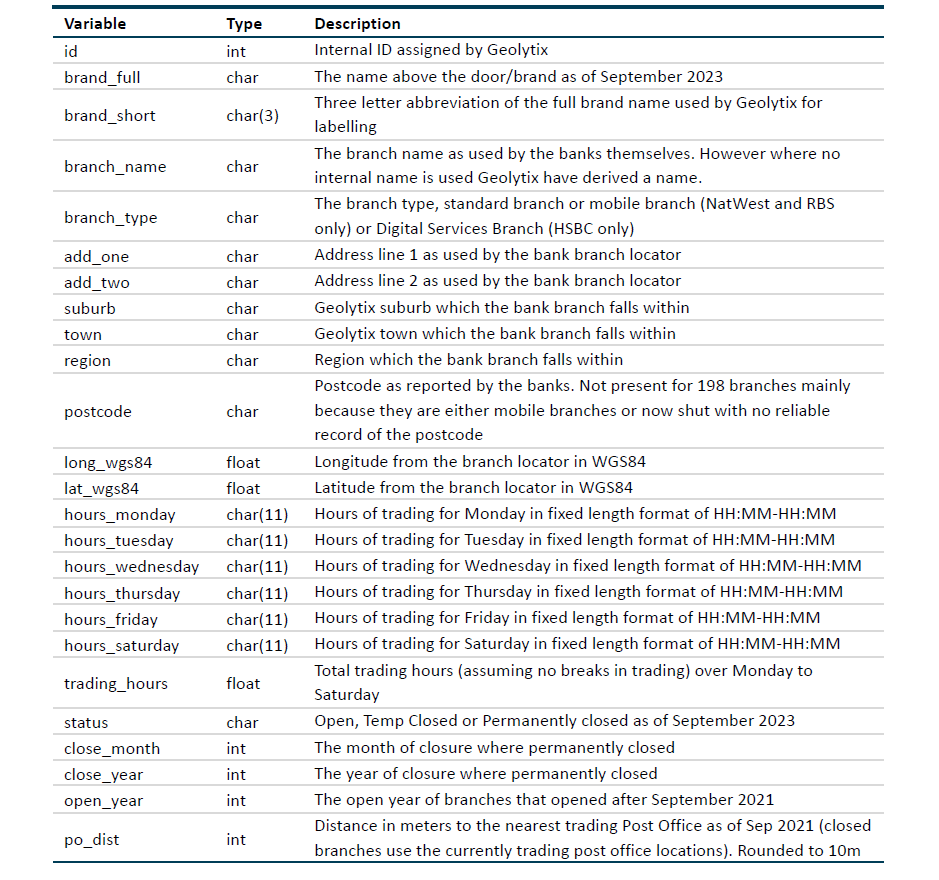

**Basic Data Stats**

Before attempting to solve the problem, it's very important to have a good understanding of data.

The goal of this section is to:
- Get the dimensions of data
- Get various statistics of data

In [7]:
#Shape of the Dataframe
print(bank_rp.shape)

(11160, 25)


The dataset has 11160 rows and 25 columns.

In [8]:
# Calculating the Descriptive Statistics
bank_rp.describe(percentiles=[.05,0.95])

,id,long_wgs84,lat_wgs84,trading_hours,close_month,close_year,po_dist,open_year
count,"11,160.0000","11,159.0000","11,159.0000","6,268.0000","4,789.0000","5,397.0000","11,159.0000",974.0000
mean,"5,583.0669",-1.8826,52.9223,30.9269,6.8833,"2,019.3771",517.6233,"2,022.5082"
std,"3,225.9791",1.7348,1.8173,11.1935,2.8800,2.5321,"5,410.3740",0.5002
min,1.0000,-8.0919,49.1840,0.0833,1.0000,"2,015.0000",0.0000,"2,022.0000"
5%,558.9500,-4.9694,50.7901,1.0000,2.0000,"2,015.0000",29.0000,"2,022.0000"
50%,"5,580.5000",-1.7644,52.4805,34.0000,7.0000,"2,019.0000",155.0000,"2,023.0000"
95%,"10,607.0500",0.5233,56.4536,44.0000,11.0000,"2,023.0000",867.1000,"2,023.0000"
max,"11,227.0000",1.7544,60.1552,63.0000,12.0000,"2,024.0000","152,883.0000","2,023.0000"


**Data Cleaning and Analysis**

In [9]:
bank_rp.info(verbose=True) # info() function used to check the dtpye of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11160 non-null  int64  
 1   brand_full       11160 non-null  object 
 2   brand_short      11160 non-null  object 
 3   branch_name      10370 non-null  object 
 4   branch_type      11160 non-null  object 
 5   add_one          10346 non-null  object 
 6   add_two          3986 non-null   object 
 7   suburb           7977 non-null   object 
 8   town             11136 non-null  object 
 9   region           10639 non-null  object 
 10  postcode         10982 non-null  object 
 11  long_wgs84       11159 non-null  float64
 12  lat_wgs84        11159 non-null  float64
 13  hours_monday     5885 non-null   object 
 14  hours_tuesday    5794 non-null   object 
 15  hours_wednesday  5686 non-null   object 
 16  hours_thursday   5695 non-null   object 
 17  hours_friday

**Calculating all NaNs and removing it.**

**Counting Nulls by column**

In [10]:
bank_rp.isnull().sum(axis=0).sort_values(ascending=False)[:12] #Using the .isnull().sum() function to count the number of empty columns.

open_year          10186
hours_saturday      9128
add_two             7174
close_month         6371
close_year          5763
hours_wednesday     5474
hours_thursday      5465
hours_tuesday       5366
hours_friday        5322
hours_monday        5275
trading_hours       4892
suburb              3183
dtype: int64

**Dropping those columns which have highest number of NULL values and are not needed in our analysis. Additionally removing some columns like add_one, suburb, town.**

In [11]:
bank_rp.drop(columns=['brand_short','open_year','hours_saturday','add_one','add_two', 'suburb','town','hours_wednesday', 'hours_thursday','hours_friday','hours_monday', 'hours_tuesday', 'trading_hours'], inplace=True)

**Counting Nulls by rows**

In [12]:
bank_rp.isnull().sum(axis=1).sort_values(ascending=False).head(20)

8199     4
8248     4
11136    4
8268     4
1132     4
8249     4
8247     4
7900     3
7907     3
7914     3
0        3
7871     3
7931     3
7945     3
7964     3
8000     3
7879     3
7841     3
7855     3
8020     3
dtype: int64

In [13]:
bank_rp.columns

Index(['id', 'brand_full', 'branch_name', 'branch_type', 'region', 'postcode',
       'long_wgs84', 'lat_wgs84', 'status', 'close_month', 'close_year',
       'po_dist'],
      dtype='object')

In `bank_rp`, there are two data types: categorical (aka `object`), and numerical (including `int64` and `float64`).

Before undertaking Classification, some data aprocessing should be done, which include:
- Converting categorical variables into dummy variables (aka one-hot encoding);
- Split the data into training and testing sets;

One note, the reason for doing one-hot encoding is that sklearn decision trees don't handle categorical data.

**Before using any  ML models we need to identify columns which we will be using in our analysis and if there are any missing values we will try to enrich the data and fill it with appropriate values.**

Now we all filling the region NaN value with columns who have same postcode.

In [14]:
bank_rp[bank_rp.region.isna()]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
0,11210,TSB,"Louth, The Salvation Army Centre",Pop Up Branch,NaN,LN11 9BS,-6.5407,53.9508,Open,NaN,NaN,"13,232.0000"
663,10287,NatWest,St Helier,Branch,NaN,JE4 8NH,-2.1433,49.2177,Open,NaN,NaN,"148,786.0000"
1034,4560,Lloyds,Jersey - Five Oaks,Branch,NaN,JE2 7TY,-2.0829,49.1962,Open,NaN,NaN,"151,841.0000"
3084,10709,NatWest,Acton Banking Hub,Banking Hub,NaN,BS27 3RB,-0.2702,51.5077,Open,NaN,NaN,993.0000
4338,11115,Barclays,Local - Holt,Local Pod,NaN,NR25 6DN,1.0895,52.9045,Open,NaN,NaN,124.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
11135,10285,NatWest,St Brelade,Branch,NaN,JE3 8FX,-2.1985,49.1934,Open,NaN,NaN,"150,942.0000"
11136,10281,NatWest,Sark Post Office,Branch,NaN,NaN,-2.3512,49.4321,Open,NaN,NaN,"123,543.0000"
11146,10699,Virgin Money,Tobermory,Branch,NaN,PA75 6NU,-6.0673,56.6231,Open,NaN,NaN,323.0000
11152,10273,NatWest,St Helier,Branch,NaN,JE4 8PJ,-2.1021,49.1860,Open,NaN,NaN,"152,722.0000"


**So, we have 521 rows where region has NaN value.**

In [15]:
# taken a separate dataframe to store region
df1 = bank_rp[bank_rp.region.isna()]

In [17]:
# Checking the unique value for region.
bank_rp.region.unique()

array([nan, 'Scotland', 'South East', 'Northern Ireland', 'London',
       'North West', 'East Midlands', 'Yorkshire and The Humber',
       'West Midlands', 'Wales', 'Eastern', 'South West', 'North East'],
      dtype=object)

In [19]:
# Removing the spaces between the postcode.
bank_rp['postcode'] = bank_rp['postcode'].replace('\s+', '', regex=True)

In [20]:
bank_rp['postcode']

0        LN119BS
1        IV408AF
2         ZE10AJ
3        IV458RQ
4        PA384BG
          ...   
11155     CR91PD
11156     G131LT
11157    PA427EL
11158    PA427DJ
11159     PR12AE
Name: postcode, Length: 11160, dtype: object

In [22]:
df2 = pd.DataFrame(bank_rp['region']) #storing region in different dataframe.

In [23]:
df2['postcode'] = bank_rp['postcode'] #Adding postcode column to df2.

In [24]:
df2.dropna(inplace = True)

In [25]:
df2 

,region,postcode
1,Scotland,IV408AF
2,Scotland,ZE10AJ
3,Scotland,IV458RQ
4,Scotland,PA384BG
5,Scotland,PH414QT
...,...,...
11154,South West,BS13EU
11155,London,CR91PD
11156,Scotland,G131LT
11157,Scotland,PA427EL


In [26]:
# Imputing region based on postcode information

for ind in bank_rp[bank_rp.region.isna() == True].index:
    val = bank_rp.postcode[ind]
    for i in df2.index:
        if df2.postcode[i] == val:
            bank_rp.region[ind] = df2.region[i]
            break


Here we have tried to fill all regions with NULL value which has the same postcode. So this way we can reduce the null values and fill it with appropriate value.

In [27]:
bank_rp[bank_rp.region.isna()]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
0,11210,TSB,"Louth, The Salvation Army Centre",Pop Up Branch,NaN,LN119BS,-6.5407,53.9508,Open,NaN,NaN,"13,232.0000"
663,10287,NatWest,St Helier,Branch,NaN,JE48NH,-2.1433,49.2177,Open,NaN,NaN,"148,786.0000"
1034,4560,Lloyds,Jersey - Five Oaks,Branch,NaN,JE27TY,-2.0829,49.1962,Open,NaN,NaN,"151,841.0000"
3084,10709,NatWest,Acton Banking Hub,Banking Hub,NaN,BS273RB,-0.2702,51.5077,Open,NaN,NaN,993.0000
4338,11115,Barclays,Local - Holt,Local Pod,NaN,NR256DN,1.0895,52.9045,Open,NaN,NaN,124.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
11134,10280,NatWest,Cobo,Branch,NaN,GY57HA,-2.5970,49.4676,Open,NaN,NaN,"116,973.0000"
11135,10285,NatWest,St Brelade,Branch,NaN,JE38FX,-2.1985,49.1934,Open,NaN,NaN,"150,942.0000"
11136,10281,NatWest,Sark Post Office,Branch,NaN,NaN,-2.3512,49.4321,Open,NaN,NaN,"123,543.0000"
11146,10699,Virgin Money,Tobermory,Branch,NaN,PA756NU,-6.0673,56.6231,Open,NaN,NaN,323.0000


**It has reduced to 477 rows.**

In [28]:
bank_rp.brand_full

0                           TSB
1        Royal Bank of Scotland
2        Royal Bank of Scotland
3        Royal Bank of Scotland
4        Royal Bank of Scotland
                  ...          
11155                   NatWest
11156                Nationwide
11157    Royal Bank of Scotland
11158    Royal Bank of Scotland
11159                   NatWest
Name: brand_full, Length: 11160, dtype: object

In [ ]:
bank_rp[(bank_rp.brand_full == 'Royal Bank of Scotland')]

Here we are trying to look at the Bank and the status and finding if there is any relation with the particular Bank which is getting closed.
Another Research Question here can be framed - **Are some companies more likely to close branches than others?**

In [ ]:
bank_rp[(bank_rp.brand_full == 'Royal Bank of Scotland') & (bank_rp.status == 'Closed')]

Now we are going to look at other columns which are useful in our analysis and if they contain any null values.

In [ ]:
bank_rp[bank_rp.brand_full.isna()]

In [ ]:
bank_rp.branch_type

In [ ]:
bank_rp[bank_rp.branch_type.isna()]

In [ ]:
# Checking if there is any relation between types of branch and the status
bank_rp[(bank_rp.branch_type == 'Mobile Branch') & (bank_rp.status == 'Closed')]

In [ ]:
# Filter the DataFrame to include only closed branches
closed_branches = bank_rp[bank_rp['status'] == 'Closed']

# Calculate the sum of closed branches
sum_closed_branches = closed_branches['id'].count()

print("Sum of closed branches:", sum_closed_branches)


In [ ]:
# Filter the DataFrame to include only closed branches
#closed_branches = bank_rp[bank_rp['status'] == 'Closed']

# Count the number of closed branches in each region
closed_branches_count = closed_branches.groupby('brand_full').size().reset_index(name='count')

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(closed_branches_count['brand_full'], closed_branches_count['count'], color='skyblue')
plt.xlabel('Bank Name')
plt.ylabel('Number of Closed Branches')
plt.title('Number of Closed Branches by Bank')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('CLOSED_Branches_Bank.png')
plt.show()

**Observations**
* The Bar-graph above show us clearly which branches are getting closed recently.
* The top three Branches are Barclays, NatWest and HSBC.
* However, we can also see many small branches are also getting closed so its not just big branches.

In [ ]:
# Count the number of closed branches in each region and branch type
closed_branches_count = closed_branches.groupby(['brand_full', 'branch_type']).size().unstack(fill_value=0)

# Create a stacked bar graph
plt.figure(figsize=(10, 6))

for i, branch_type in enumerate(closed_branches_count.columns):
    plt.bar(closed_branches_count.index, closed_branches_count[branch_type], bottom=closed_branches_count.iloc[:, :i].sum(axis=1), label=branch_type)

plt.xlabel('Bank_Name')
plt.ylabel('Number of Closed Branches')
plt.title('Stacked Bar Chart of Closed Branches by Bank and Branch Type')
plt.legend(title='Branch Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Closed_Banks_Branch_Type.png')
plt.show()

**Observations**

* When we make a Stacked Bar Chart to see what type of branches are closed. So, there are four types of branches- Agency, Branch, Digital Services Branch and Mobile Branch. Mostly Main Branch are closed so which shows another pattern that its not necessary that only mobile branch are getting closed.

In [ ]:
bank_rp[(bank_rp.branch_type == 'Branch') & (bank_rp.status == 'Closed')]

So 5017 banks comes under closed branch which has the type Branch.

**For one hot encoding we will select columns to keep in our analysis and start the machine learning modelling.**

In [ ]:
columns_to_keep = ['brand_full', 'branch_type', 'region', 'status', 'po_dist']

In [ ]:
final_bank_rp = bank_rp[columns_to_keep]

In [ ]:
final_bank_rp

In [ ]:
# Drop the region column with na values.
final_bank_rp.drop(final_bank_rp[final_bank_rp.region.isna()].index.array, axis=0, inplace=True)

In [ ]:
final_bank_rp

In [ ]:
final_bank_rp[final_bank_rp.po_dist.isna()]

In [ ]:
# Drop the po_dist row with na values.
final_bank_rp.drop(final_bank_rp[final_bank_rp.po_dist.isna()].index.array, axis=0, inplace=True)

**So, now we have all the columns without any NULL values and which will help in our Analysis**
The columns are
* Bank Name - 'brand_full'
* Type of the Branch - 'branch_type'
* Region- 'region'
* Status -'status'
* Distance of the Post Office - 'po_dist'

In [ ]:
# In status column we have three values which we should modify - closed/open/closing
final_bank_rp.status

In [ ]:
# Replace 'closing' with 'closed' in the 'status' column
final_bank_rp['status'] = final_bank_rp['status'].replace('Closing', 'Closed')

In [ ]:
final_bank_rp['status'].unique()

In [ ]:
final_bank_rp.info()

**Creating a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly showing percentage distribution in the pie-chart.**

In [ ]:
#function to create piecharts for all categorical columns
def pieplots(data):
    col_names = data.columns[pd.Series(data.columns).apply(lambda x : final_bank_rp[x].dtype == 'object')]
    for col in col_names:
        print('Pie of column',col)
        temp_data = data[col].value_counts()
        print(temp_data)
        plt.pie(temp_data, labels=temp_data.index, autopct='%.1f%%');
        plt.show()

In [ ]:
pieplots(final_bank_rp)   #calling function pieplots for creating pie charts of all categorical variables

**Observations**

* We already checked for the banks which are more in number like Natwest, Barclays, Llyods and HSBC.
* We have 91.11 % of main branch and 6.84 mobile branch.
* Regions having high branch is Scotland with 13.74%, South East 13.42% and London 11.94%.
* There are 50.66% of closed branches and 49.34% open branches.

### Converting categorical variables
First, we need to convert categorical variables into dummy/indicator variables, using `One-Hot Encoding`and 'Label Encoding'
Now we have checked all the columns.  
For the status we will do **Label encoding** as it has only two values open and closed and for the other three columns brand_full, branch_type, region we will do 'One-Hot Encoding`

In [ ]:
print(final_bank_rp['brand_full'].unique())

In [ ]:
print(final_bank_rp['branch_type'].unique())
print(final_bank_rp['region'].unique())

**One-Hot Encoding**

In [ ]:
final_bank_rp_encoded = pd.get_dummies(final_bank_rp, columns=['brand_full', 'branch_type', 'region'], drop_first =True, dtype = int)
# Use dtype = int because one-hot encoding was giving boolean value.

In [ ]:
final_bank_rp_encoded.head()

In [ ]:
final_bank_rp_encoded.info()

In [ ]:
print(final_bank_rp_encoded['po_dist'].dtype)

**Here we want to check if there are any outliers or not in po_dist because that is our numerical column.**

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot
axs[0].boxplot(final_bank_rp_encoded['po_dist'])
axs[0].set_title('Box Plot of po_dist')
axs[0].set_ylabel('Distance')
axs[0].set_xticklabels([''])

# Plot a histogram
axs[1].hist(final_bank_rp_encoded['po_dist'], bins=20, edgecolor='black')
axs[1].set_title('Histogram of po_dist')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
final_bank_rp_encoded.po_dist.describe()

**Observations**

1. The box-plot and histogram shows a number of outliers roughly with values above 75th percentile. These outliers may introduce bias in the data. Therefore these outliers have to be removed or treated.
   
2. As we are looking at branches which have been closed based on distance. Typically if a post-office is closer to the branch there is high chance for bank to decide to closed down the branch and offer transaction to customers through Post Office. Assuming that this is true removing these outliers may not impact the decision to close the branch based on distance from Post Office.

**Removing Outliers from po_dist column.**

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = final_bank_rp_encoded['po_dist'].quantile(0.25)
Q3 = final_bank_rp_encoded['po_dist'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
final_bank_rp_encoded = final_bank_rp_encoded[(final_bank_rp_encoded['po_dist'] >= lower_bound) & (final_bank_rp_encoded['po_dist'] <= upper_bound)]


In [ ]:
final_bank_rp_encoded.po_dist.describe()

**Standardizing the distance column**

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'po_dist' column and transform it
final_bank_rp_encoded['po_dist'] = scaler.fit_transform(final_bank_rp_encoded[['po_dist']])

In [ ]:
final_bank_rp_encoded.po_dist.describe()

In [ ]:
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
final_bank_rp_encoded['status']= label_encoder.fit_transform(final_bank_rp_encoded['status'])

final_bank_rp_encoded['status'].unique()

In [ ]:
final_bank_rp_encoded

<a id="ID_Method"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 5.0 | Methodology

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples.

**Splitting data into random train and test subsets**

By default, `train_test_split` will split the data according to a 75:25 split.
The split should be random in order to avoid selection bias. Here, we set random_state=100 to guarantee reproducibility.
Here we input two dataframes (X and Y) and will get four outputs (train_x, test_x, train_y, test_y).

In [ ]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(final_bank_rp_encoded.drop(['status'], axis = 1), final_bank_rp_encoded.status, random_state=random_state_split)

Double check the rows and columns of the outputs.

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

**The Dependant variable (y) here is closed and open labeled as 0 and 1. So we are using *Decision Tree Classifier*.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 5)
# Train Decision Tree Classifer
clf = clf.fit(train_x,train_y)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(test_x)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred)) # so everytime i run this the value changes.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d');

In [ ]:
print("Classification Report")
print(metrics.classification_report(test_y, y_pred, labels=[0,1]))

In [ ]:
Model_results = pd.DataFrame(columns = ['Model Name','Train Accuracy','Test Accuracy','Precision','Recall','F-Score'])

In [ ]:
#Model_results.loc[len(Model_results.index)] = [mod, train_accuracy, test_accuracy, precision, recall, fscore]

We got a classification rate of 63.38%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

**Tuning hyperparameters of the ML model**

In machine learning, hyperparameters are the model settings predefined by the user, e.g. maximum height of the decision tree.

The best hyperparametrs are subjective and differs for every dataset.

**Optimizing Decision Tree Performance parameters**

**criterion** : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure.
Supported criteria are **“gini”** for the Gini index and **“entropy”** for the information gain.

**splitter** : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are **“best”** to choose the best split and **“random”** to choose the best random split.

**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

**RandomizedSearchCV**
<br>[here]https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html<br>

In [ ]:
#Here we are using RandomizedSearchCV, it implements a “fit” and a “score” method.
#The parameters of the estimator used to apply these methods are optimized by cross-validated
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint #The randint() method returns an integer number selected element from the specified range.

In [ ]:
# Create Decision Tree classifer object
clf_tune = DecisionTreeClassifier(random_state = 5)

In [ ]:
#parameters for hyperparameter initialisation
params = {
            'criterion': ['gini', 'entropy', 'log_loss']
            , 'splitter': ['best','random']
            , 'max_depth': randint(2,50)
            , 'max_features': ['auto','sqrt','log2',None]
            , 'class_weight': ['balanced',None]
        }

In [ ]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(clf_tune, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [ ]:
random_search.fit(train_x,train_y)

In [ ]:
#predicted best parameter
random_search.best_params_

In [ ]:
random_search.best_estimator_

In [ ]:
clf_tune = random_search.best_estimator_

# Train Decision Tree Classifer
clf_tune = clf_tune.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = clf_tune.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
#After Tuning the accuracy has decreased.

Here we can see that after tuning the Classification Accuracy has increased to 66.50 which is an improved rate than the previous model.

In [ ]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d');

Model is predicting po_dist 580 times (TP), 599 (FN) misclassifications and 1042 (TN) and 218 (FP) misclassifications.

In [ ]:
print("Classification Report")
print(metrics.classification_report(test_y, y_pred, labels=[0,1]))

**To Check more Model we will use Random Forest Classifier**

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=5)

# fit the model

rfc.fit(train_x,train_y)

In [ ]:
# Predict the Test set results

y_pred = rfc.predict(test_x)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_y, y_pred)))

For tuning RF the parameters added here are

In [ ]:
# Create Random Forest Classifer object
rfc_tune = RandomForestClassifier(random_state=5)

In [ ]:
from scipy.stats import uniform

In [ ]:
#parameters for hyperparameter initialisation
params = {
            'n_estimators': randint(10,200)
            , 'criterion': ['gini','entropy','log_loss']
            , 'max_depth': randint(2,30)
            , 'max_features': ['sqrt','log2',None]
            , 'bootstrap': [True,False]
            , 'class_weight': ['balanced','balanced_subsample',None]
            , 'max_samples': uniform(0.0,1.0)
        }

In [ ]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(rfc_tune, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [ ]:
random_search.fit(train_x,train_y)

In [ ]:
#predicted best parameter
random_search.best_params_

In [ ]:
random_search.best_estimator_

In [ ]:
rfc_tune = random_search.best_estimator_

# Train Decision Tree Classifer
rfc_tune = rfc_tune.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = rfc_tune.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
#After Tuning the accuracy has decreased.

So, for Random forest after tuning and taking the best hyperparametrs we get an improved accuracy score to **67.69.**

 **Train a model using XGBoost.**

Now we are training the Model using XGBoost. It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb1 = XGBClassifier(nthread = -1, random_state=5)
xgb1.fit(train_x, train_y)
xgb1

In [ ]:
y_pred = xgb1.predict(test_x)

In [ ]:
print('Train data accuracy:', xgb1.score(train_x, train_y))
print('Test data accuracy:' ,xgb1.score(test_x, test_y))

So, we can see here that by using XGBoost the test accuracy has improved to 67.77%. To improve the predictions further we can tune it using RandomizedSearchCV.

In [ ]:
# Create Decision Tree classifer object
xgb1 = XGBClassifier(nthread = -1, random_state=5)

In [ ]:
#parameters for hyperparameter initialisation
params = {
            'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
            'max_depth' : randint(2,50),   #[3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_child_weight' : randint(1,10), #[1,3,5,7],
            'gamma' : [0.0,0.1,0.2,0.3,0.4],
            'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7]
        }

In [ ]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(xgb1, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [ ]:
random_search.fit(train_x,train_y)

In [ ]:
#predicted best parameter
random_search.best_params_

In [ ]:
random_search.best_estimator_

In [ ]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier(class_weight=None, criterion='log_loss', max_depth= 17, max_features='sqrt', splitter='best', random_state=5)
#clf = DecisionTreeClassifier(class_weight=None, criterion='log_loss', max_depth=16, max_features=None, splitter='best', random_state=5)
xgb1 = random_search.best_estimator_

# Train Decision Tree Classifer
xgb1 = xgb1.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = xgb1.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
#After Tuning the accuracy has decreased.

In [ ]:
import seaborn as sns
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d');

**Model is predicting status 790 times (TP), 389 (FN) misclassifications and 880 (TN) and 380 (FP) misclassifications.**

In [ ]:
print("Classification Report")
print(metrics.classification_report(test_y, y_pred, labels=[0,1]))

LIMITATIONS-
we can also see which year has maximum closed branches and maybe because of recession or COVID-19 and any particular month where the branches are closed.

<a id="ID_Result"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology](#ID_Method) | [6.0 Results](#ID_Result) | [Bibliography](#ID_biblio)  

***
## Results and Discussion

The dataset we have is a problem of Classification. So, When we used the Decision Tree Classifier we got the accuracy of 63.38 which is not very good and shows the underfitting. To improve it further we added hyperparametrs. The confusion matrix for decision tree classifier.

A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.

<a id="ID_biblio"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology](#ID_Method) | [6.0 Results](#ID_Result) | [Bibliography](#ID_biblio)  

***
## Bibliography

 
* Clark, S., Newing, A., Hood, N. & Birkin, M. (2023) Retail banking closures in the United Kingdom. Are neighbourhood characteristics associated with retail bank branch closures? Transactions of the Institute of British Geographers, 00, 1–20. Available from: https://doi.org/10.1111/tran.12656
 

* Sonea, A. and Westerholt, R. (2021) Geographic and temporal access to basic banking services offered through post offices in Wales - Applied Spatial Analysis and policy, SpringerLink. Available at: https://link.springer.com/article/10.1007/s12061-021-09386-3 (Accessed: 18 April 2024).

* Sonea, A., Guo,W., & Jarvis, S (2019). Exploratory spatial analysis of access to physical and digital retail 
banking channels. Tech rep., Think Forward Initiative, Amsterdam.

* Sklearn.model_selection.RANDOMIZEDSEARCHCV (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html (Accessed: 16 April 2024).

* The Post Office Network Report 2021. Available at: https://corporate.postoffice.co.uk/media/lzkfri54/network-report-2020-21-regular-print-final-2.pdf (Accessed: 18 April 2024). 

* Treasury, H. (2022) New powers to protect access to cash, GOV.UK. Available at: https://www.gov.uk/government/news/new-powers-to-protect-access-to-cash (Accessed: 12 April 2024)

* UK Bank & Building Societies Points (2021) Geolytix. Available at: https://geolytix.com/blog/banking-building-societies-locations/ (Accessed: 18 April 2024). .


* University of Bristol (2022) Bank closures drive people to the post office to handle cash, September: Bank closure impact on Post Offices | News and features | University of Bristol. Available at: https://www.bristol.ac.uk/news/2022/september/bank-closure-impact-on-post-offices.html (Accessed: 12 April 2024)

* Which firms does the PRA regulate? (2023) Bank of England. Available at: https://www.bankofengland.co.uk/prudential-regulation/authorisations/which-firms-does-the-pra-regulate (Accessed: 13 April 2024)..


  

  
